In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [48]:
import sys
import pathlib

In [58]:
try:
    import matplotlib_views as views
except ModuleNotFoundError:
    cwd = pathlib.Path().resolve().parent
    sys.path.append(str(cwd))
    import matplotlib_views as views

In [59]:
from matplotlib_views import histograms

In [60]:
import numpy as np

In [61]:
import matplotlib.pyplot as plt

## Create some fake data

In [62]:
def gauss_2d(mu, sigma):
    x = np.random.normal(mu, sigma)
    y = np.random.normal(mu, sigma)
    return (x, y)

def generate_random_points(mu, sigma, n_points=1_000):
    """ Return array of X and Y values around mu and sigma """
    values = [gauss_2d(mu, sigma) for _ in range(n_points)]
    values = np.asarray(values)
    values = values.T
    return values

In [115]:
values1 = generate_random_points(1, 20) + 10
values2 = generate_random_points(3, 50) + 40
values3 = generate_random_points(3, 10, n_points=500) + 100

In [116]:
xvalues = list(values1[0]) + list(values2[0]) + list(values3[0])
yvalues = list(values1[1]) + list(values2[1]) + list(values3[1])

## Create figure

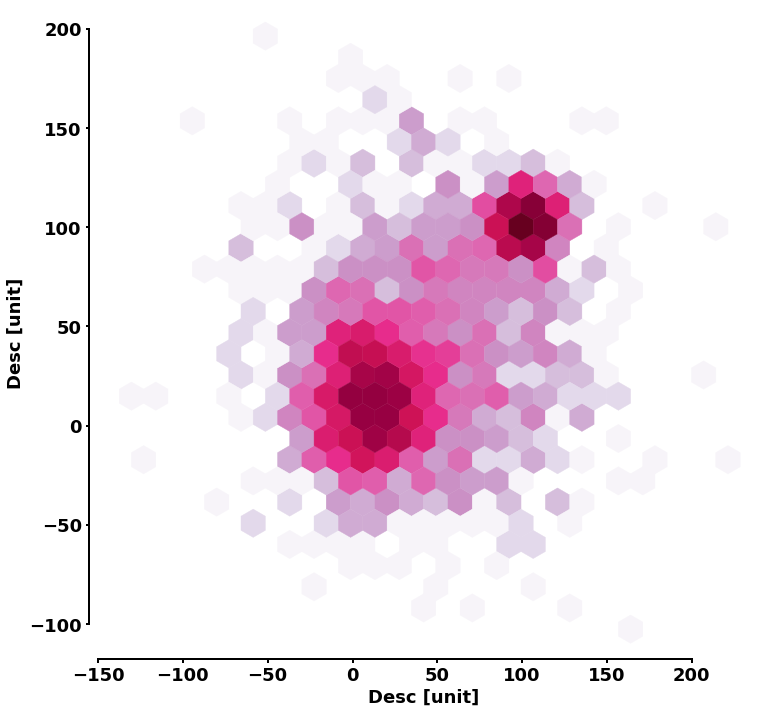

In [117]:
views.set_global_style()
fig, ax = views.get_plot()
histograms.two_dimensional_hex(ax, xvalues, yvalues)
views.fix_borders(ax)
ax.set_ylabel("Desc [unit]")
ax.set_xlabel("Desc [unit]")
pass

## Create histogram figure, but with KDE

In [130]:
from scipy.stats import gaussian_kde

In [133]:
from matplotlib.ticker import NullFormatter

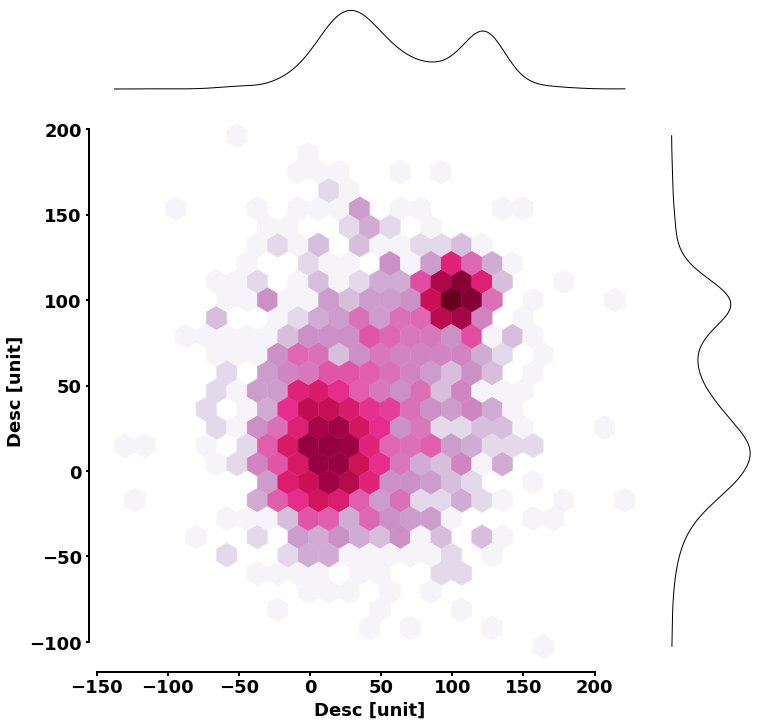

In [143]:
# Define margins and relative dimensions
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

# Define layout
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.1]
rect_histy = [left_h, bottom, 0.1, height]

# Define axis and figures
fig = plt.figure(figsize=(12, 12))
ax_scatter = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx)
ax_histy = fig.add_axes(rect_histy)

# Fill in scatterplot / histogram
histograms.two_dimensional_hex(ax_scatter, xvalues, yvalues)

# Fill in KDE
min_x, max_x, min_y, max_y = views.get_tick_limits(ax_scatter)

bins = np.linspace(min_x, max_x, 300)
gaussian_kernel = gaussian_kde(xvalues)
values = gaussian_kernel(bins)
ax_histx.plot(bins, values, "k", linewidth=1.0)

bins = np.linspace(min_y, max_y, 300)
gaussian_kernel = gaussian_kde(yvalues)
values = gaussian_kernel(bins)
ax_histy.plot(values, bins, "k", linewidth=1.0)

# Fix borders
nullfmt = NullFormatter()
ax_histx.xaxis.set_major_formatter(nullfmt)
ax_histy.yaxis.set_major_formatter(nullfmt)
views.fix_borders(ax_histx, visibles=[False, False, False, False])
views.fix_borders(ax_histy, visibles=[False, False, False, False])
ax_histx.set_xticks([])
ax_histx.set_yticks([])
ax_histy.set_xticks([])
ax_histy.set_yticks([])

# Fix border of scatterplot
views.fix_borders(ax_scatter)

# Set labels
ax_scatter.set_xlabel("Desc [unit]")
ax_scatter.set_ylabel("Desc [unit]")

pass